# Assignment 3: Track 1 Dyna-Q Project Report

## Team: DynaQties
* Nikhil Kakodkar: 260578689 
* Karim Koreitem: 260460964

In [1]:
% matplotlib inline
from core import dyna_main
import matplotlib.pyplot as plt

## Setup Parameters

In [2]:
def init_default_config():
    config = {'arch' : 'dyna_q',
              'terminal_steps' : 6000,
              'switch_maze_at_step' : 3000,
              'maze_type' : 'blocking',
              'maze_params' : {
                  'row' : 6,
                  'col' : 9,
                  'start_row' : 6,
                  'start_col' : 4
              },
              'policy' : 'epsilon_greedy',
              'policy_params' : {
                  'epsilon' : 0.1,
                  'seed' : 24
              },
              'learning_alg' : 'q_learning',
              'learning_alg_params' : {
                  'alpha' : 0.1,
                  'gamma' : 0.95,
                  'seed' : 42
              },
              'model' : 'deterministic_no_prior',
              'model_params' : {
                  'sim_epoch' : 500
              },
              'planner_params' : {
                  'kappa' : 0.01
              }
             }
    return config

## Blocking Maze

### Dyna-Q

In [3]:
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'blocking'
cum_reward_lst, steps = dyna_main.run_experiment(config)

### Dyna-Q+

In [4]:
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'blocking'
cum_reward_lst_qplus, steps_qplus = dyna_main.run_experiment(config)

### Plot: Dyna-Q vs Dyna-Q+ Blocking Maze Cumulative Reward

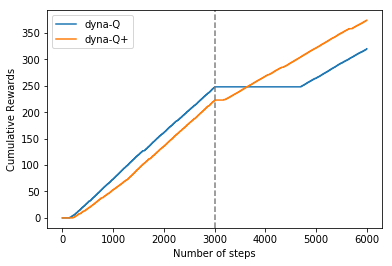

In [5]:
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.plot(range(0,steps), cum_reward_lst, label='dyna-Q')
plt.plot(range(0,steps_qplus), cum_reward_lst_qplus, label='dyna-Q+')
plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.legend()

## Shortcut Maze

### Dyna-Q

In [6]:
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'shortcut'
cum_reward_lst, steps = dyna_main.run_experiment(config)

### Dyna-Q+

In [7]:
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'shortcut'
cum_reward_lst_qplus, steps_qplus = dyna_main.run_experiment(config)

### Plot: Dyna-Q vs Dyna-Q+ Shortcut Maze Cumulative Reward

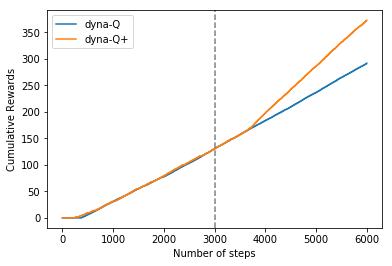

In [8]:
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.plot(range(0,steps), cum_reward_lst, label='dyna-Q')
plt.plot(range(0,steps_qplus), cum_reward_lst_qplus, label='dyna-Q+')
plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.legend()

## Dyna-Q+: Experimenting over different kappa values

### Blocking Maze

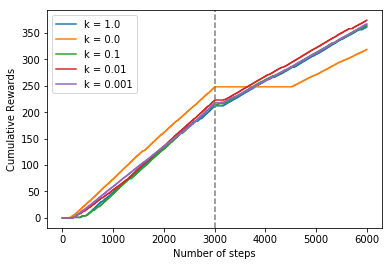

In [9]:
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'blocking'
for k in [1.0, 0.0, 0.1, 0.01, 0.001]:    
    config['planner_params']['kappa'] = k
    cum_reward_lst_qplus, steps_qplus = dyna_main.run_experiment(config)
    plt.plot(range(0,steps_qplus), cum_reward_lst_qplus, label='k = ' + str(k))
plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.legend()

### Shortcut Maze

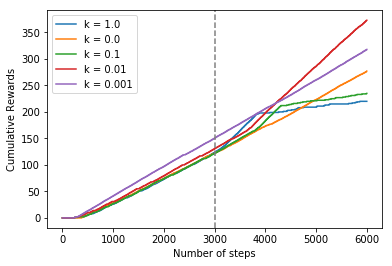

In [10]:
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'shortcut'
for k in [1.0, 0.0, 0.1, 0.01, 0.001]:    
    config['planner_params']['kappa'] = k
    cum_reward_lst_qplus, steps_qplus = dyna_main.run_experiment(config)
    plt.plot(range(0,steps_qplus), cum_reward_lst_qplus, label='k = ' + str(k))

plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.legend()

## Dyna-Q: Experimenting over different sim-epoch (n) values


### Blocking Maze

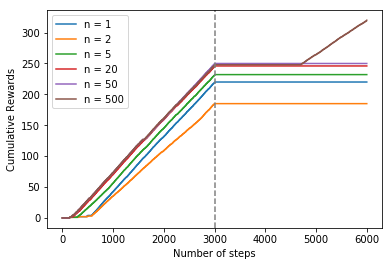

In [11]:
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'blocking'
for n in [1, 2, 5, 20, 50, 500]:    
    config['model_params']['sim_epoch'] = n
    cum_reward_lst, steps = dyna_main.run_experiment(config)
    plt.plot(range(0,steps), cum_reward_lst, label='n = ' + str(n))

plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.legend()

### Shortcut Maze

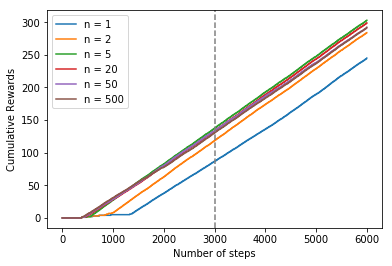

In [12]:
config = init_default_config()
config['arch'] = 'dyna_q'
config['maze_type'] = 'shortcut'
for n in [1, 2, 5, 20, 50, 500]:    
    config['model_params']['sim_epoch'] = n
    cum_reward_lst, steps = dyna_main.run_experiment(config)
    plt.plot(range(0,steps), cum_reward_lst, label='n = ' + str(n))

plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
plt.legend()